In [5]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [84]:
%pip install vnstock-ezchart

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install arch


   ---------------------------------------- 0.0/923.9 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/923.9 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 923.9/923.9 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/44.5 MB 12.2 MB/s eta 0:00:04
   ---- ----------------------------------- 5.5/44.5 MB 14.0 MB/s eta 0:00:03
   ------- -------------------------------- 7.9/44.5 MB 13.2 MB/s eta 0:00:03
   -------- ------------------------------- 9.4/44.5 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 11.3/44.5 MB 10.8 MB/s eta 0:00:04
   ------------ --------------------------- 13.4/44.5 MB 10.9 MB/s eta 0:00:03
   ------------- -------------------------- 14.9/44.5 MB 10.6 MB/s eta 0:00:03
   -------------- ------------------------- 16.5/44.5 MB 10.0 MB/s eta 0:00:03
   ---------------- ----------------------- 18.6/44.5 MB 10.0 MB/s eta

In [ ]:
%pip install -U vnstock3

In [2]:
from vnstock3 import Vnstock
stock = Vnstock().stock(symbol='VN30F1M', source='VCI')
df = stock.quote.history(start='2018-01-01', end='2022-12-31')
# Đặt cột 'time' làm cột index
df.set_index('time', inplace=True)
df


Phiên bản Vnstock 0.3.0.8 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock3 --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 0.3.0.7

2024-10-23 14:16:08,905 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,open,high,low,close,volume
time,,,,,
2018-01-02,983.9,999.0,980.8,999.0,11347
2018-01-03,1002.5,1015.2,1002.0,1012.8,16134
2018-01-04,1014.8,1023.9,1012.8,1023.9,13815
2018-01-05,1024.1,1025.0,1007.0,1012.0,16296
2018-01-08,1008.3,1031.0,1005.7,1030.0,13326
...,...,...,...,...,...
2022-12-26,1030.3,1031.8,985.0,986.4,379662
2022-12-27,989.8,1010.0,983.5,1001.0,410156
2022-12-28,998.1,1017.7,991.0,1008.0,382256


In [10]:
df.to_csv('C:\\Users\\MY PC\\Desktop\\Stock Trend Prediction Web\\Notebook\\data.csv')
df

,open,high,low,close,volume
time,,,,,
2018-01-02,983.9,999.0,980.8,999.0,11347
2018-01-03,1002.5,1015.2,1002.0,1012.8,16134
2018-01-04,1014.8,1023.9,1012.8,1023.9,13815
2018-01-05,1024.1,1025.0,1007.0,1012.0,16296
2018-01-08,1008.3,1031.0,1005.7,1030.0,13326
...,...,...,...,...,...
2022-12-26,1030.3,1031.8,985.0,986.4,379662
2022-12-27,989.8,1010.0,983.5,1001.0,410156
2022-12-28,998.1,1017.7,991.0,1008.0,382256


In [12]:
ma100 = df.close.rolling(100).mean()
ma100 

time
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
                ...   
2022-12-26    1113.502
2022-12-27    1111.012
2022-12-28    1108.517
2022-12-29    1105.802
2022-12-30    1103.187
Name: close, Length: 1248, dtype: float64

NameError: name 'ma100' is not defined

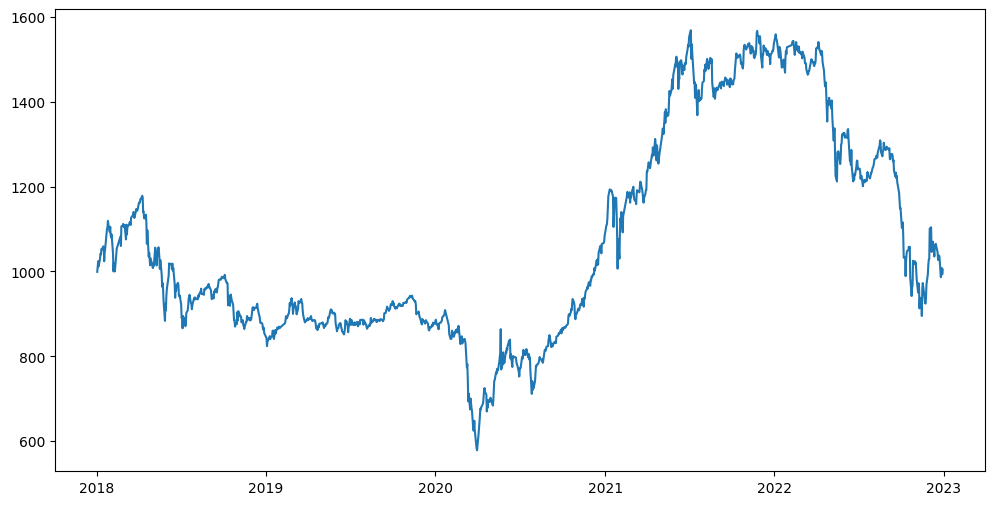

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.close) 
plt.plot (ma100,'r')  

In [3]:
ma200 = df.close.rolling(200).mean()
ma200 

time
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
              ..
2022-12-26   NaN
2022-12-27   NaN
2022-12-28   NaN
2022-12-29   NaN
2022-12-30   NaN
Name: close, Length: 1248, dtype: float64

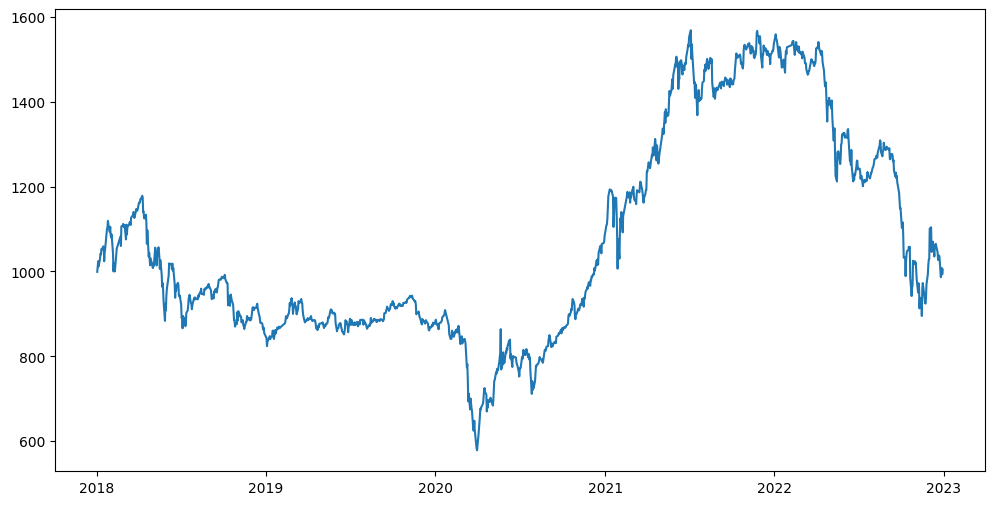

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.close) 
plt.plot (ma200,'r')  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


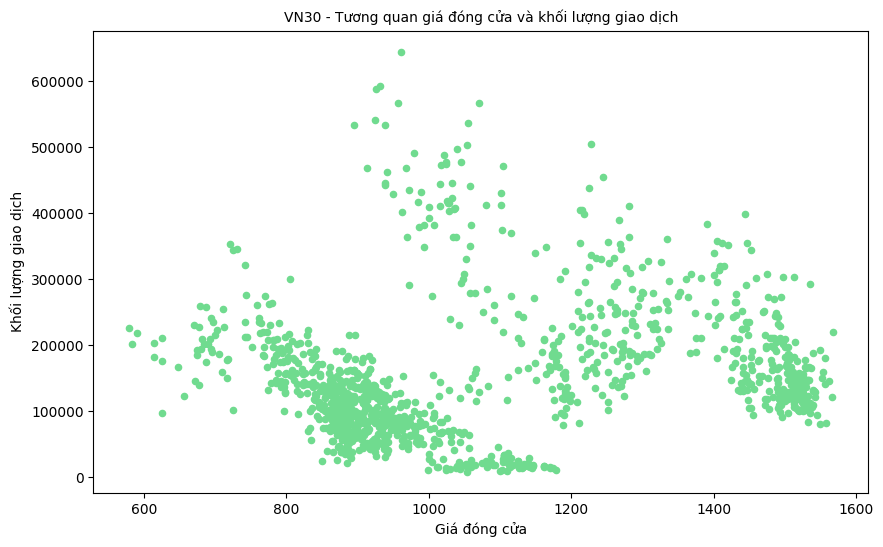

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'VN30 - Tương quan giá đóng cửa và khối lượng giao dịch'}, xlabel='Giá đóng cửa', ylabel='Khối lượng giao dịch'>)

In [20]:
df.viz.scatter(x='close', y='volume',
               title='VN30 - Tương quan giá đóng cửa và khối lượng giao dịch',
               xlabel='Giá đóng cửa',
               ylabel='Khối lượng giao dịch',
               figsize=(10, 6),
               color_palette='stock')

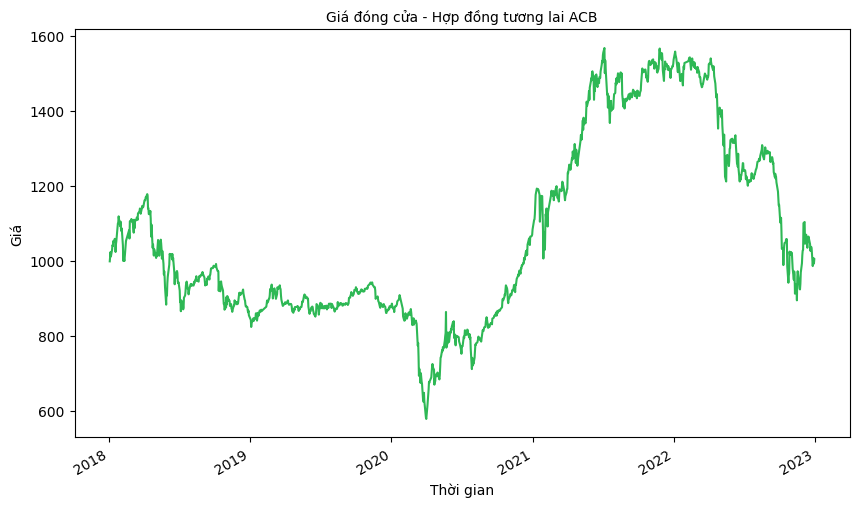

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Giá đóng cửa - Hợp đồng tương lai ACB'}, xlabel='Thời gian', ylabel='Giá'>)

In [38]:
# Mở help cho biểu đồ timeseries để xem tất cả các tuỳ chọn
df['close'].viz.timeseries(figsize=(10, 6), 
                           title='Giá đóng cửa - Hợp đồng tương lai ACB', 
                           ylabel='Giá', 
                           xlabel='Thời gian',
                           color_palette='vnstock',
                           palette_shuffle=True)

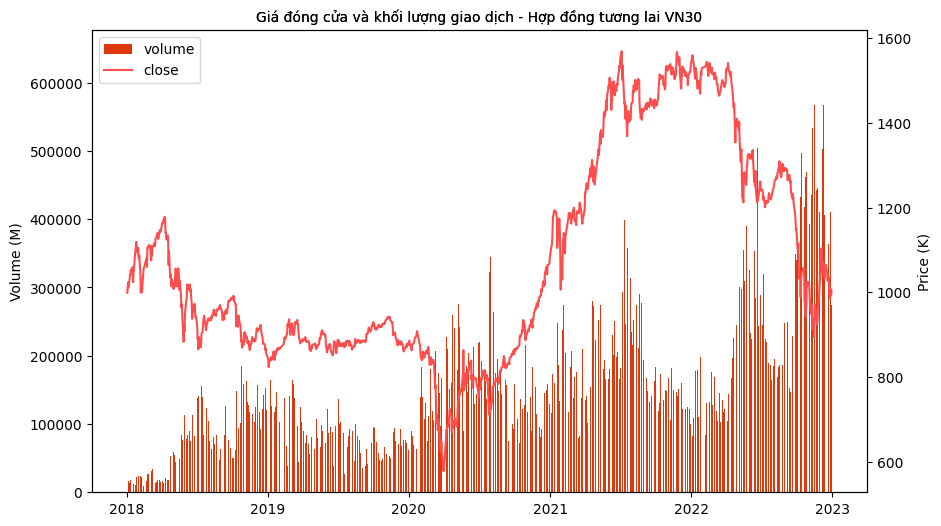

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30'}, ylabel='Volume (M)'>,
 <Axes: title={'center': 'Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30'}, ylabel='Price (K)'>)

In [39]:
# Mở help cho biểu đồ combo để xem tất cả các tuỳ chọn
df.viz.combo(bar_data='volume',
             line_data='close',
             title='Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30',
             left_ylabel='Volume (M)', right_ylabel='Price (K)',
             figsize=(10, 6),
             color_palette='stock',
             palette_shuffle=True)

In [122]:
df['returns'] = df['close'].pct_change() * 100

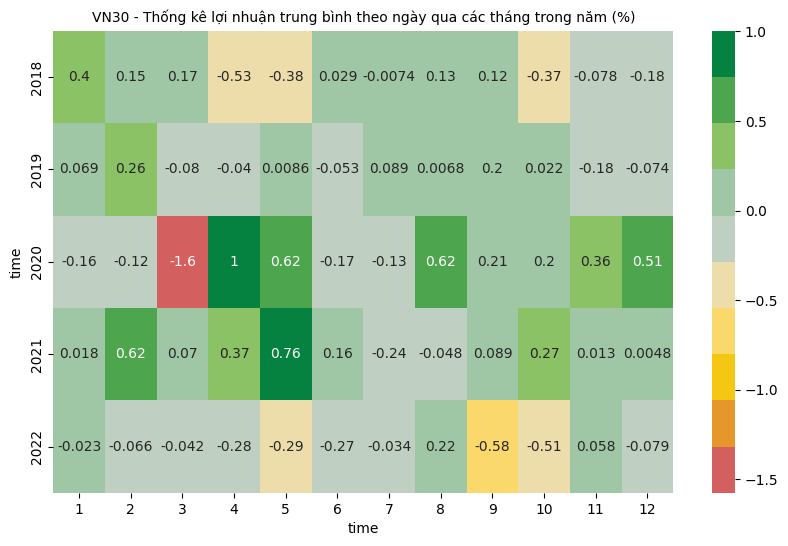

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'VN30 - Thống kê lợi nhuận trung bình theo ngày qua các tháng trong năm (%)'}, xlabel='time', ylabel='time'>)

In [123]:
# Mở help cho biểu đồ heatmap để xem tất cả các tuỳ chọn
import pandas as pd
return_pivot = pd.pivot_table(df, index=df.index.year, columns=df.index.month, values='returns', aggfunc='mean')
cmap = df.viz.create_cmap('percentage') # Tạo colormap bằng 1 bảng màu có trong vnstock_ezchart
return_pivot.viz.heatmap(figsize=(10, 6),
                         title='VN30 - Thống kê lợi nhuận trung bình theo ngày qua các tháng trong năm (%)',
                         annot=True,
                         cmap=cmap)

DIS Volatility

In [41]:
returns = 100 * df['close'].pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

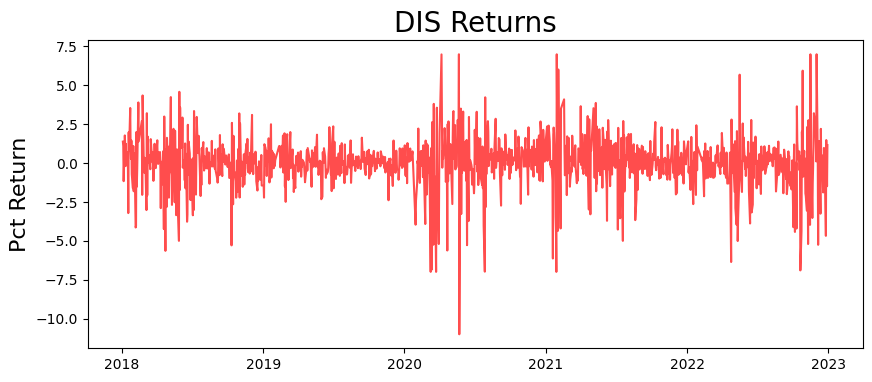

In [42]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

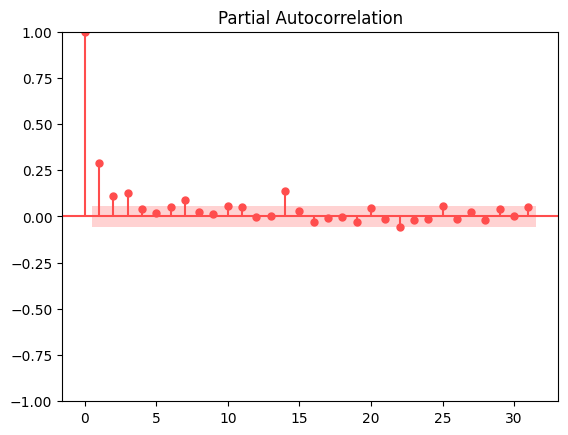

In [48]:
plot_pacf(returns**2)
plt.show()

In [49]:
model = arch_model(returns, p=3, q=3)


In [50]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 4003.1398656896954
Iteration:      2,   Func. Count:     25,   Neg. LLF: 3999.367461072059
Iteration:      3,   Func. Count:     36,   Neg. LLF: 3616.1763556953465
Iteration:      4,   Func. Count:     47,   Neg. LLF: 2821.692187935104
Iteration:      5,   Func. Count:     58,   Neg. LLF: 2352.6605826652153
Iteration:      6,   Func. Count:     68,   Neg. LLF: 2196.846300527232
Iteration:      7,   Func. Count:     78,   Neg. LLF: 2288.796602348287
Iteration:      8,   Func. Count:     88,   Neg. LLF: 2209.3303388741733
Iteration:      9,   Func. Count:     98,   Neg. LLF: 2202.49749691459
Iteration:     10,   Func. Count:    108,   Neg. LLF: 2199.305011062684
Iteration:     11,   Func. Count:    118,   Neg. LLF: 2195.7120699798706
Iteration:     12,   Func. Count:    128,   Neg. LLF: 2196.9950182143566
Iteration:     13,   Func. Count:    138,   Neg. LLF: 2191.783423731863
Iteration:     14,   Func. Count:    148,   Neg. LLF: 2190.

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2190.01
Distribution:                  Normal   AIC:                           4396.01
Method:            Maximum Likelihood   BIC:                           4437.04
                                        No. Observations:                 1247
Date:                Mon, Oct 21 2024   Df Residuals:                     1246
Time:                        00:34:40   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0294  3.503e-02      0.838      0.402 [-3.931e-02,9.801e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1348      0.241      0.559      0.576    [ -0.338,  0.608]
alpha[1]       0.2041  4.647e-02      4.392  1.125e-05    [  0.113,  0.295]
alpha[2]       0.0378      0.448  8.438e-02      0.933    [ -0.841,  0.917]
alpha[3]       0.0324  6.389e-02      0.508      0.612 [-9.279e-02,  0.158]
beta[1]    4.3661e-17      2.200  1.985e-17      1.000    [ -4.312,  4.312]
beta[2]        0.5296      0.440      1.203      0.229    [ -0.333,  1.392]
beta[3]        0.1621      1.231      0.132      0.895    [ -2.251,  2.575]
===========================================================================

Covariance estimator: robust
"""

Try GARCH(3,0) = ARCH(3)

In [51]:
model = arch_model(returns, p=3, q=0)

In [117]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4675.56153015889
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5765.917820991186
Iteration:      3,   Func. Count:     25,   Neg. LLF: 9083.291861635902
Iteration:      4,   Func. Count:     32,   Neg. LLF: 14152.56923422296
Iteration:      5,   Func. Count:     39,   Neg. LLF: 7405.174124988909
Iteration:      6,   Func. Count:     46,   Neg. LLF: 8885.351477911216
Iteration:      7,   Func. Count:     54,   Neg. LLF: 8443.660427364948
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2290.5064279143235
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2248.3228914058836
Iteration:     10,   Func. Count:     75,   Neg. LLF: 2241.357957270733
Iteration:     11,   Func. Count:     81,   Neg. LLF: 2240.39944917683
Iteration:     12,   Func. Count:     87,   Neg. LLF: 2240.3530117529663
Iteration:     13,   Func. Count:     93,   Neg. LLF: 2240.343465759492
Iteration:     14,   Func. Count:     99,   Neg. LLF: 2240.3418

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2240.34
Distribution:                  Normal   AIC:                           4490.68
Method:            Maximum Likelihood   BIC:                           4516.32
                                        No. Observations:                 1247
Date:                Sun, Oct 20 2024   Df Residuals:                     1246
Time:                        20:30:27   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0167  3.980e-02      0.419      0.675 [-6.134e-02,9.469e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.9836      0.179      5.503  3.743e-08   [  0.633,  1.334]
alpha[1]       0.2968  6.024e-02      4.927  8.367e-07   [  0.179,  0.415]
alpha[2]       0.0735  2.617e-02      2.809  4.977e-03 [2.221e-02,  0.125]
alpha[3]       0.3811      0.112      3.388  7.041e-04   [  0.161,  0.602]
==========================================================================

Covariance estimator: robust
"""

In [52]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [53]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

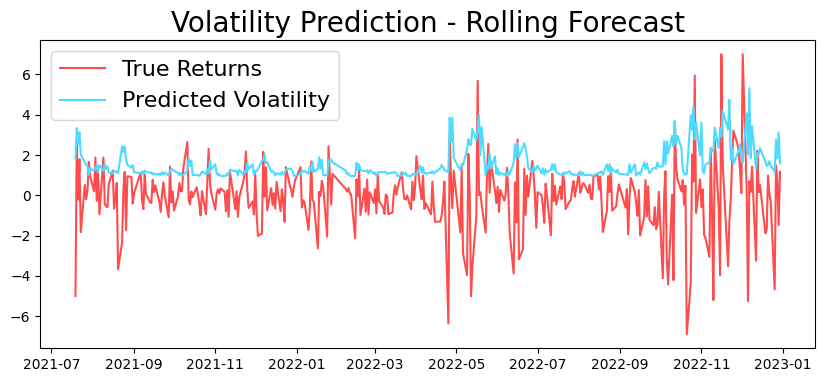

In [54]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [103]:
stock = Vnstock().stock(symbol='VN30F1M', source='VCI')
df = stock.quote.history(start='2020-01-01', end='2022-12-31')
df.set_index('time', inplace=True)
df

2024-10-21 01:00:51,885 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,open,high,low,close,volume
time,,,,,
2020-01-02,877.5,886.3,876.5,886.3,70480
2020-01-03,887.1,887.9,879.5,879.5,70389
2020-01-06,877.5,883.5,871.6,872.0,83770
2020-01-07,873.9,877.8,871.6,875.0,83997
2020-01-08,868.0,871.0,863.4,863.7,90489
...,...,...,...,...,...
2022-12-26,1030.3,1031.8,985.0,986.4,379662
2022-12-27,989.8,1010.0,983.5,1001.0,410156
2022-12-28,998.1,1017.7,991.0,1008.0,382256


In [104]:
returns = 100 * df['close'].pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

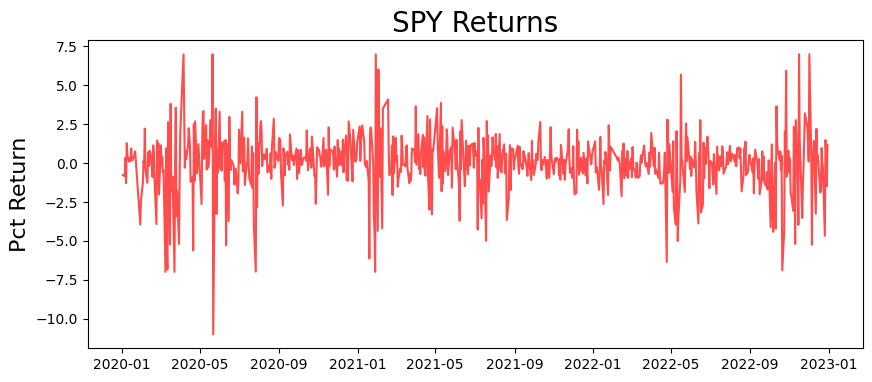

In [105]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

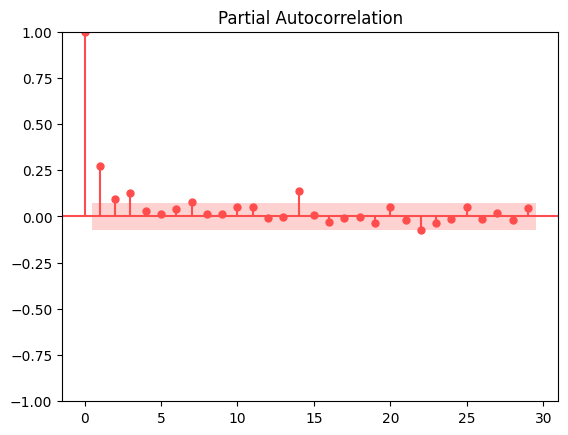

In [106]:
plot_pacf(returns**2)
plt.show()

In [107]:
model = arch_model(returns, p=2, q=2)

In [108]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2640.6770172490424
Iteration:      2,   Func. Count:     17,   Neg. LLF: 677717.7776039429
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1466.1488261147028
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1432.7867189671406
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1477.0238454193423
Iteration:      6,   Func. Count:     50,   Neg. LLF: 1459.4560251479252
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1426.0454441414918
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1440.952130696533
Iteration:      9,   Func. Count:     74,   Neg. LLF: 1426.1845128520931
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1421.592290723024
Iteration:     11,   Func. Count:     90,   Neg. LLF: 1415.5759117600328
Iteration:     12,   Func. Count:     97,   Neg. LLF: 1415.5286648937397
Iteration:     13,   Func. Count:    104,   Neg. LLF: 1415.5129477745133
Iteration:     14,   Func. Count:    111,   Neg. LLF: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1415.50
Distribution:                  Normal   AIC:                           2843.01
Method:            Maximum Likelihood   BIC:                           2870.70
                                        No. Observations:                  747
Date:                Mon, Oct 21 2024   Df Residuals:                      746
Time:                        01:01:04   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0452  5.156e-02      0.877      0.380 [-5.581e-02,  0.146]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1629  8.703e-02      1.871  6.128e-02   [-7.705e-03,  0.333]
alpha[1]       0.2170  5.222e-02      4.155  3.252e-05      [  0.115,  0.319]
alpha[2]   3.0610e-16  4.275e-02  7.160e-15      1.000 [-8.379e-02,8.379e-02]
beta[1]        0.1792      0.145      1.232      0.218      [ -0.106,  0.464]
beta[2]        0.5700      0.109      5.215  1.834e-07      [  0.356,  0.784]
=============================================================================

Covariance estimator: robust
"""

In [109]:
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [111]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*2:])

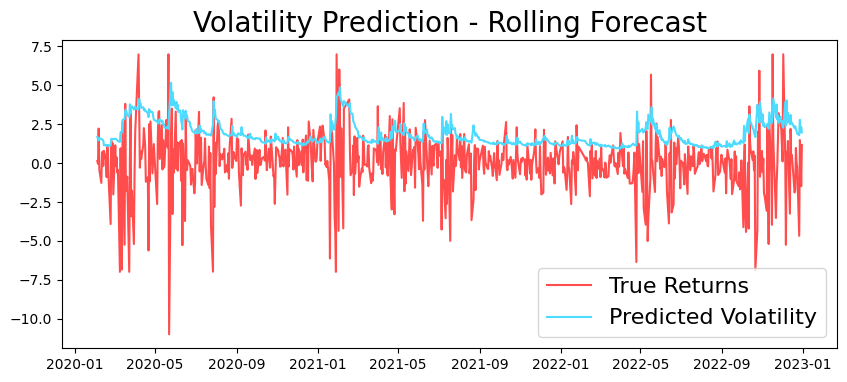

In [112]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*2:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [113]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [114]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

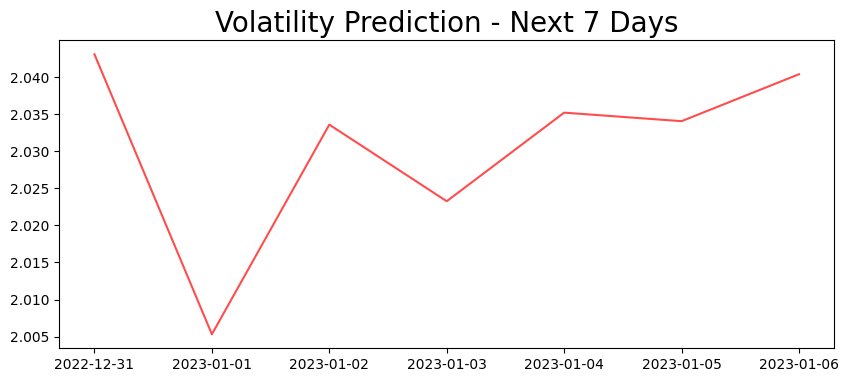

In [115]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)